In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [7]:
df = pd.read_csv('compras_ricasa.csv',delimiter=';')

In [8]:
df.head()

,Lugar de Compra,Fecha,Producto,Cantidad,Precio Unit/Kg,SubTotal,Categoria,Comentario
0,TADICOR,3/1/2020,PAN RALLADO,5.0,91.6,457.99,SECO,NaN
1,TADICOR,3/1/2020,HARINA LEUDANTE,10.0,38.99,389.90,SECO,NaN
2,TADICOR,3/1/2020,LIMON,1.0,156.99,156.99,FRESCO,NaN
3,VERDULERIA,7/1/2020,TOMATE,NaN,NaN,45.00,FRESCO,NaN
4,CARLA,7/1/2020,HUEVO,NaN,5,40.00,FRESCO,NaN


In [9]:
df.dtypes

Lugar de Compra      object
Fecha                object
Producto             object
Cantidad            float64
 Precio Unit/Kg      object
SubTotal            float64
Categoria            object
Comentario           object
dtype: object

In [10]:
df['Categoria'].unique()

array(['SECO', 'FRESCO', 'PACKAGING', 'LOGÍSTICA', 'ADMIN', 'INSUMO',
       'INVERSION', 'COMERCIAL', 'SISTEMA'], dtype=object)

To here, the data presentation

In [11]:
# Change de type of "fecha" to date

In [12]:
df['Fecha'] = pd.to_datetime(df.Fecha)

In [13]:
# for analysys, create one more column that has Month & Year
df['mes_año'] = df['Fecha'].dt.strftime('%m') + df['Fecha'].dt.strftime('%Y')
df['year'] = df['Fecha'].dt.year

In [14]:
df.head()

,Lugar de Compra,Fecha,Producto,Cantidad,Precio Unit/Kg,SubTotal,Categoria,Comentario,mes_año,year
0,TADICOR,2020-03-01,PAN RALLADO,5.0,91.6,457.99,SECO,NaN,032020,2020
1,TADICOR,2020-03-01,HARINA LEUDANTE,10.0,38.99,389.90,SECO,NaN,032020,2020
2,TADICOR,2020-03-01,LIMON,1.0,156.99,156.99,FRESCO,NaN,032020,2020
3,VERDULERIA,2020-07-01,TOMATE,NaN,NaN,45.00,FRESCO,NaN,072020,2020
4,CARLA,2020-07-01,HUEVO,NaN,5,40.00,FRESCO,NaN,072020,2020


Identify the principal costs of the product: \
queso, harina leudante, pan rallado, soja

In [15]:
df10 = df.groupby(['Producto','mes_año','year'])['Cantidad'].sum().reset_index()

In [16]:
soja = df10[df10['Producto'].isin(['SOJA'])]

In [17]:
soja.sort_values('Cantidad')

,Producto,mes_año,year,Cantidad
633,SOJA,112020,2020,10.0
624,SOJA,062021,2021,11.0
618,SOJA,022021,2021,14.0
615,SOJA,012020,2020,24.0
634,SOJA,122020,2020,28.0
621,SOJA,052020,2020,30.0
631,SOJA,102020,2020,38.0
635,SOJA,122021,2021,41.0
628,SOJA,082021,2021,43.0
617,SOJA,022020,2020,45.0


In [21]:
limon = df10[df10['Producto'].isin(['LIMON'])]

In [22]:
limon.sort_values('Cantidad')

,Producto,mes_año,year,Cantidad
354,LIMON,112021,2021,1.0
338,LIMON,032020,2020,1.0
350,LIMON,092021,2021,1.0
341,LIMON,052020,2020,1.0
355,LIMON,122020,2020,1.0
356,LIMON,122021,2021,2.0
334,LIMON,012021,2021,2.0
335,LIMON,012022,2022,2.0
353,LIMON,112020,2020,2.0
343,LIMON,062020,2020,2.0


In [23]:
harina = df10[df10['Producto'].isin(['HARINA LEUDANTE'])]

In [24]:
harina.sort_values('Cantidad',ascending=False)

,Producto,mes_año,year,Cantidad
255,HARINA LEUDANTE,062021,2021,132.0
244,HARINA LEUDANTE,012021,2021,118.0
243,HARINA LEUDANTE,012020,2020,108.0
249,HARINA LEUDANTE,032021,2021,90.0
253,HARINA LEUDANTE,052021,2021,68.0
264,HARINA LEUDANTE,102021,2021,62.0
257,HARINA LEUDANTE,072021,2021,60.0
260,HARINA LEUDANTE,092020,2020,60.0
250,HARINA LEUDANTE,042020,2020,50.0
254,HARINA LEUDANTE,062020,2020,50.0


In [25]:
queso_fresco = df10[df10['Producto'].isin(['QUESO FRESCO'])]

In [26]:
queso_fresco.sort_values('Cantidad',ascending=False)

,Producto,mes_año,year,Cantidad
580,QUESO FRESCO,052021,2021,47.537
570,QUESO FRESCO,012021,2021,44.505
569,QUESO FRESCO,012020,2020,34.880
579,QUESO FRESCO,052020,2020,31.095
585,QUESO FRESCO,072021,2021,30.770
582,QUESO FRESCO,062020,2020,30.355
595,QUESO FRESCO,122021,2021,29.399
576,QUESO FRESCO,042020,2020,28.854
577,QUESO FRESCO,042021,2021,27.521
586,QUESO FRESCO,082020,2020,27.475


In [27]:
pan_rallado = df10[df10['Producto'].isin(['PAN RALLADO'])]

In [28]:
pan_rallado.sort_values('Cantidad',ascending=False)

,Producto,mes_año,year,Cantidad
495,PAN RALLADO,062021,2021,20.0
499,PAN RALLADO,082021,2021,13.0
484,PAN RALLADO,012020,2020,13.0
501,PAN RALLADO,092021,2021,12.0
504,PAN RALLADO,112020,2020,11.0
485,PAN RALLADO,012021,2021,10.0
490,PAN RALLADO,032021,2021,9.0
503,PAN RALLADO,102021,2021,9.0
496,PAN RALLADO,072020,2020,9.0
502,PAN RALLADO,102020,2020,9.0


In [29]:
# group the ammount by Category

In [30]:
category_ammount = df.groupby(['mes_año', 'Categoria','year','Producto'])['SubTotal'].sum().reset_index()

<AxesSubplot:xlabel='mes_año', ylabel='SubTotal'>

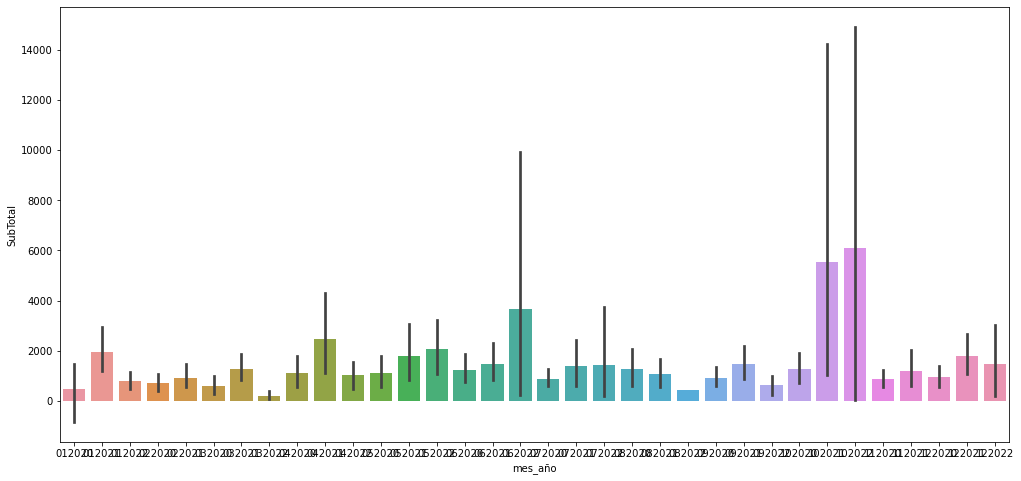

In [31]:
plt.figure(figsize=(17,8))
sns.barplot(data=category_ammount,x='mes_año',y='SubTotal')

In [32]:
category_ammount.sort_values('year',ascending=False)

,mes_año,Categoria,year,Producto,SubTotal
685,122022,SECO,2022,NUEZ,250.00
576,102022,LOGÍSTICA,2022,NAFTA,36.00
85,012022,LOGÍSTICA,2022,NAFTA,1600.25
84,012022,INSUMO,2022,HIGIENE Y CUIDADO,345.99
83,012022,FRESCO,2022,ZANAHORIA,320.00
...,...,...,...,...,...
417,082020,FRESCO,2020,CEB DE VERDEO,300.00
186,042020,ADMIN,2020,ADMINISTRATIVO,2649.00
187,042020,COMERCIAL,2020,MARKETING,269.50
188,042020,FRESCO,2020,ACEITUNA,120.92


<AxesSubplot:xlabel='Categoria', ylabel='SubTotal'>

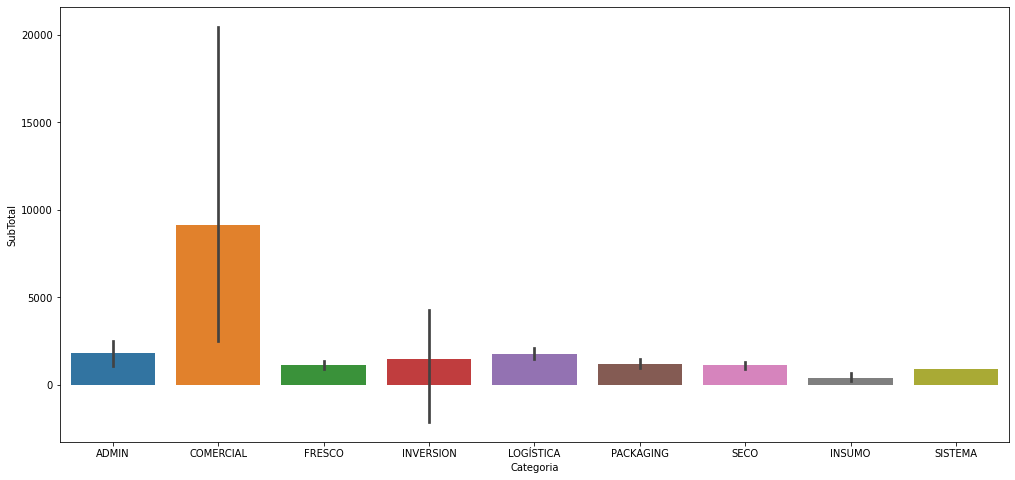

In [34]:
plt.figure(figsize=(17,8))
sns.barplot(data=category_ammount,x='Categoria',y='SubTotal')

# I am going to asume that "comercial,admin, inversión" its immovable
# So focus the analysis in Packaging, Fresco, Seco y Logística

<AxesSubplot:xlabel='Categoria', ylabel='SubTotal'>

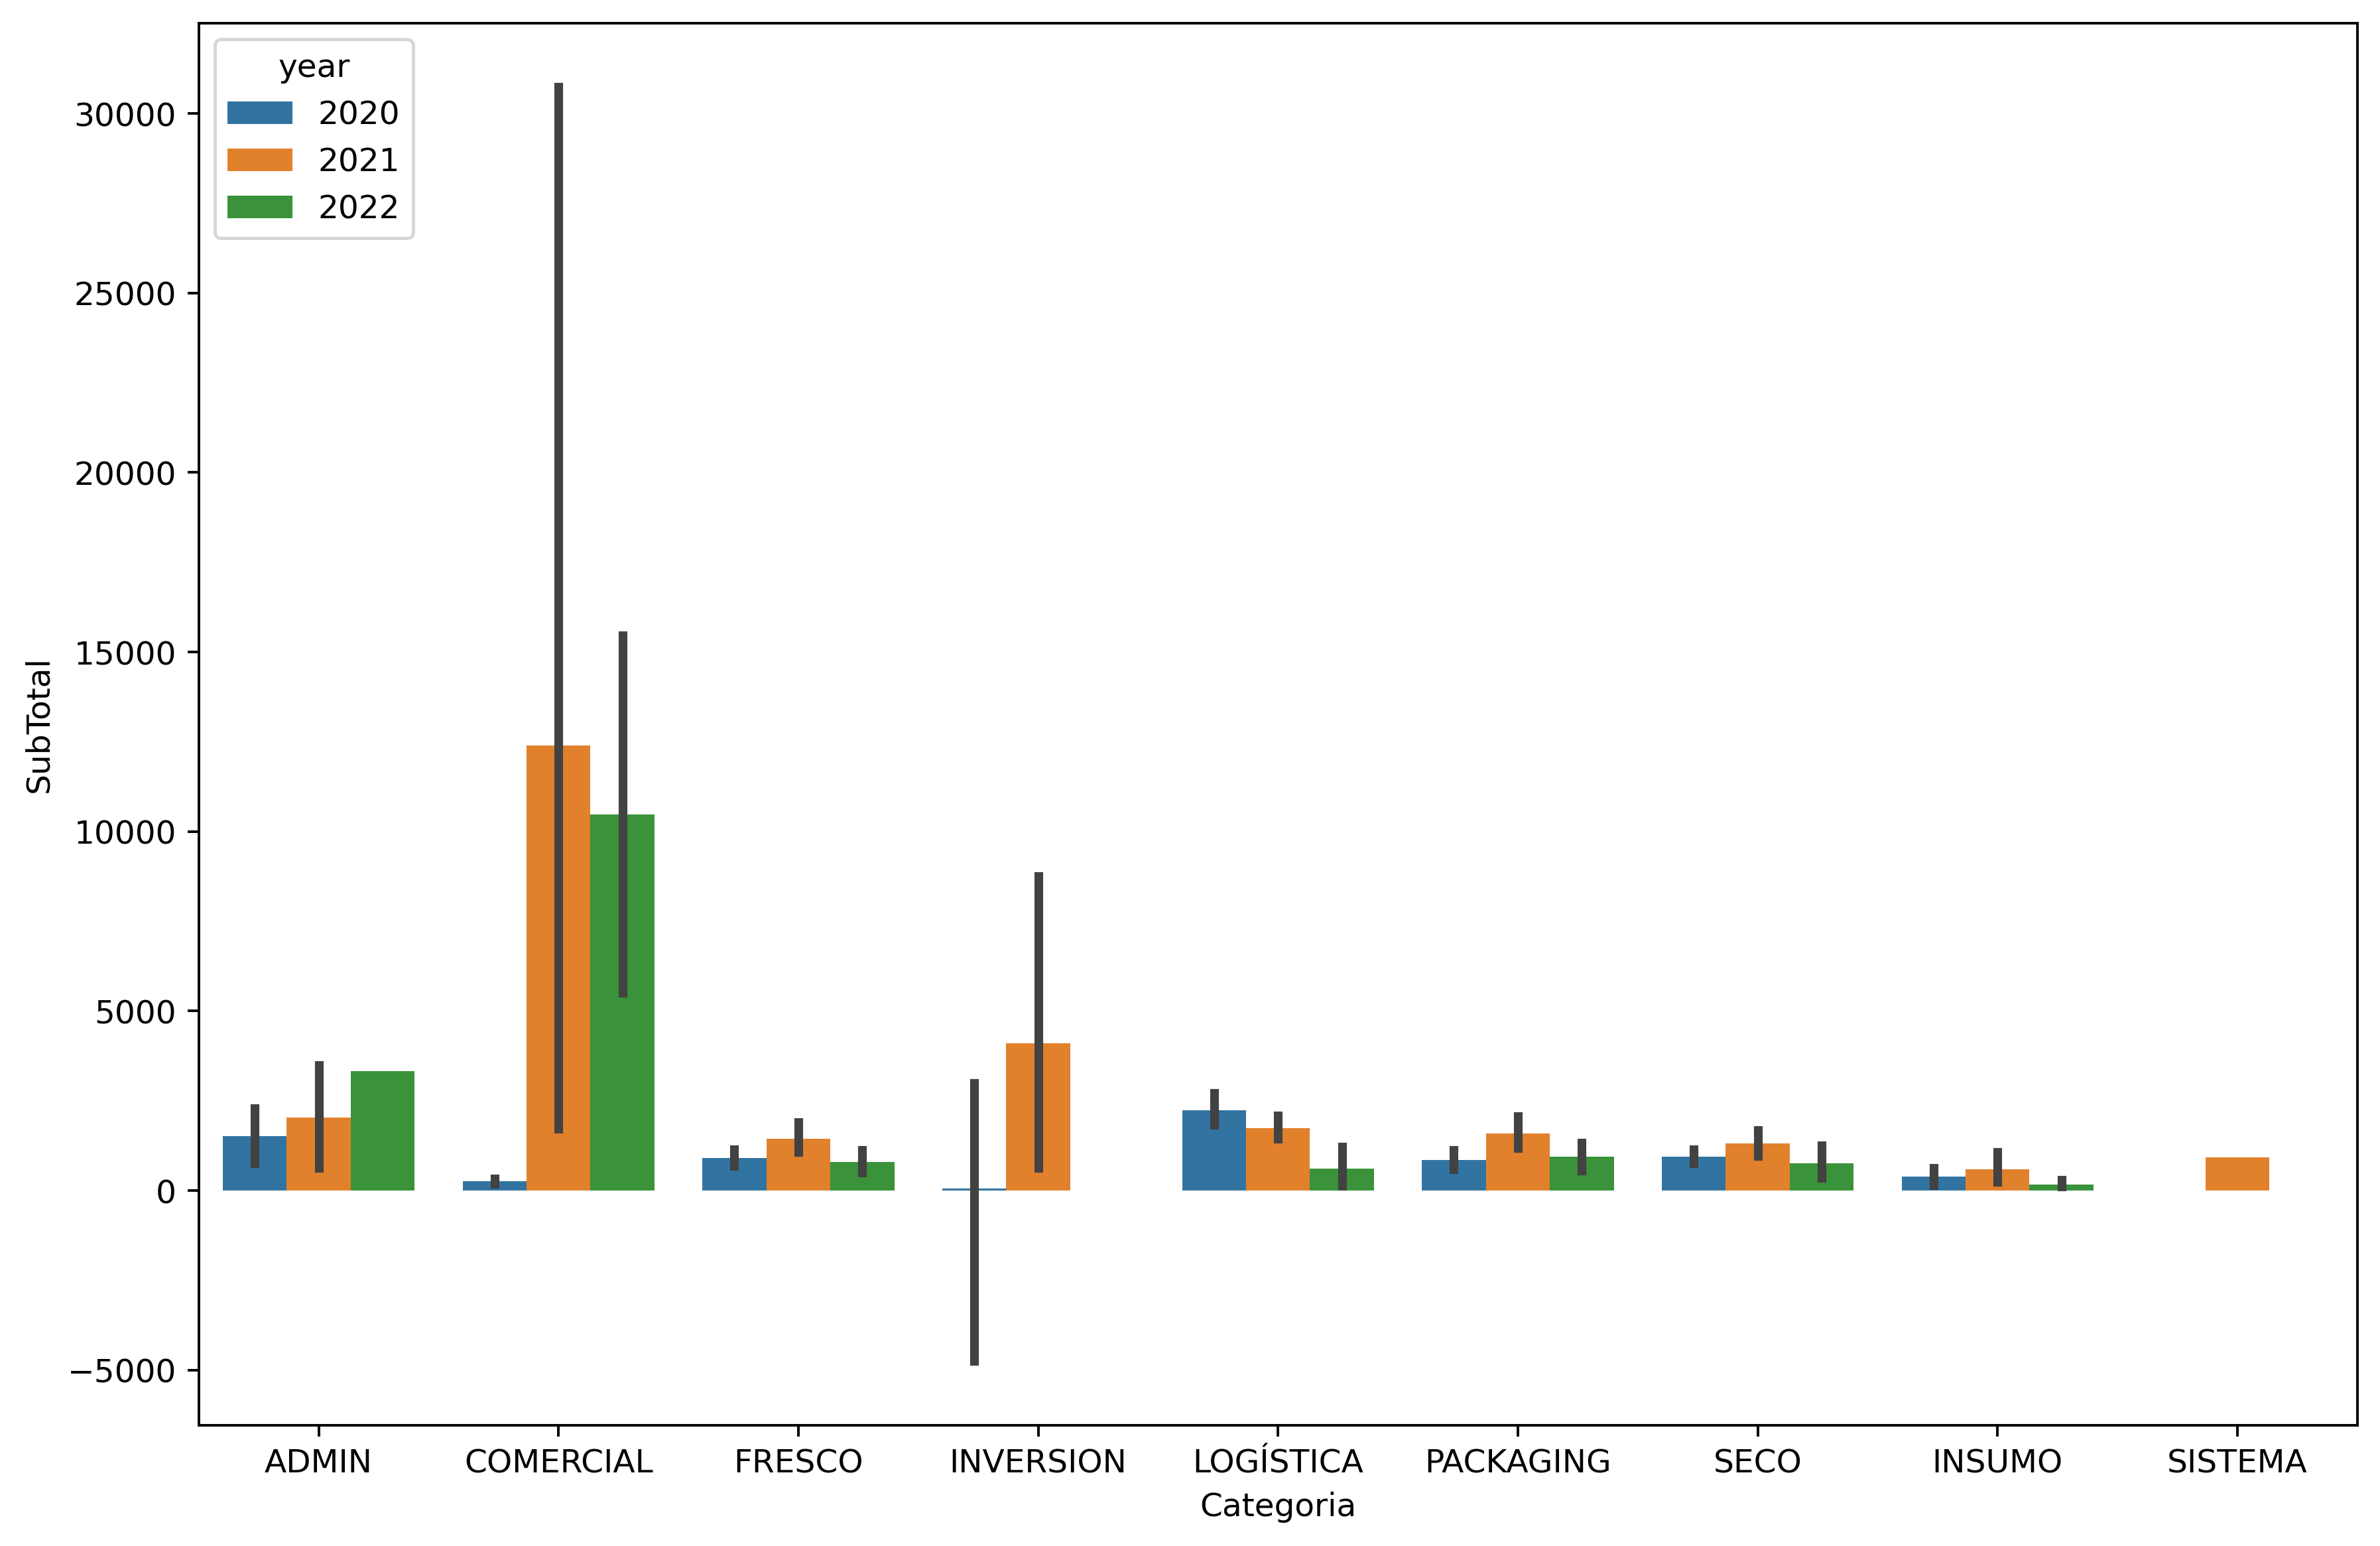

In [35]:
plt.figure(figsize=(12,8),dpi=350)
sns.barplot(data=category_ammount,x='Categoria',y='SubTotal',hue='year')

<AxesSubplot:xlabel='Categoria', ylabel='SubTotal'>

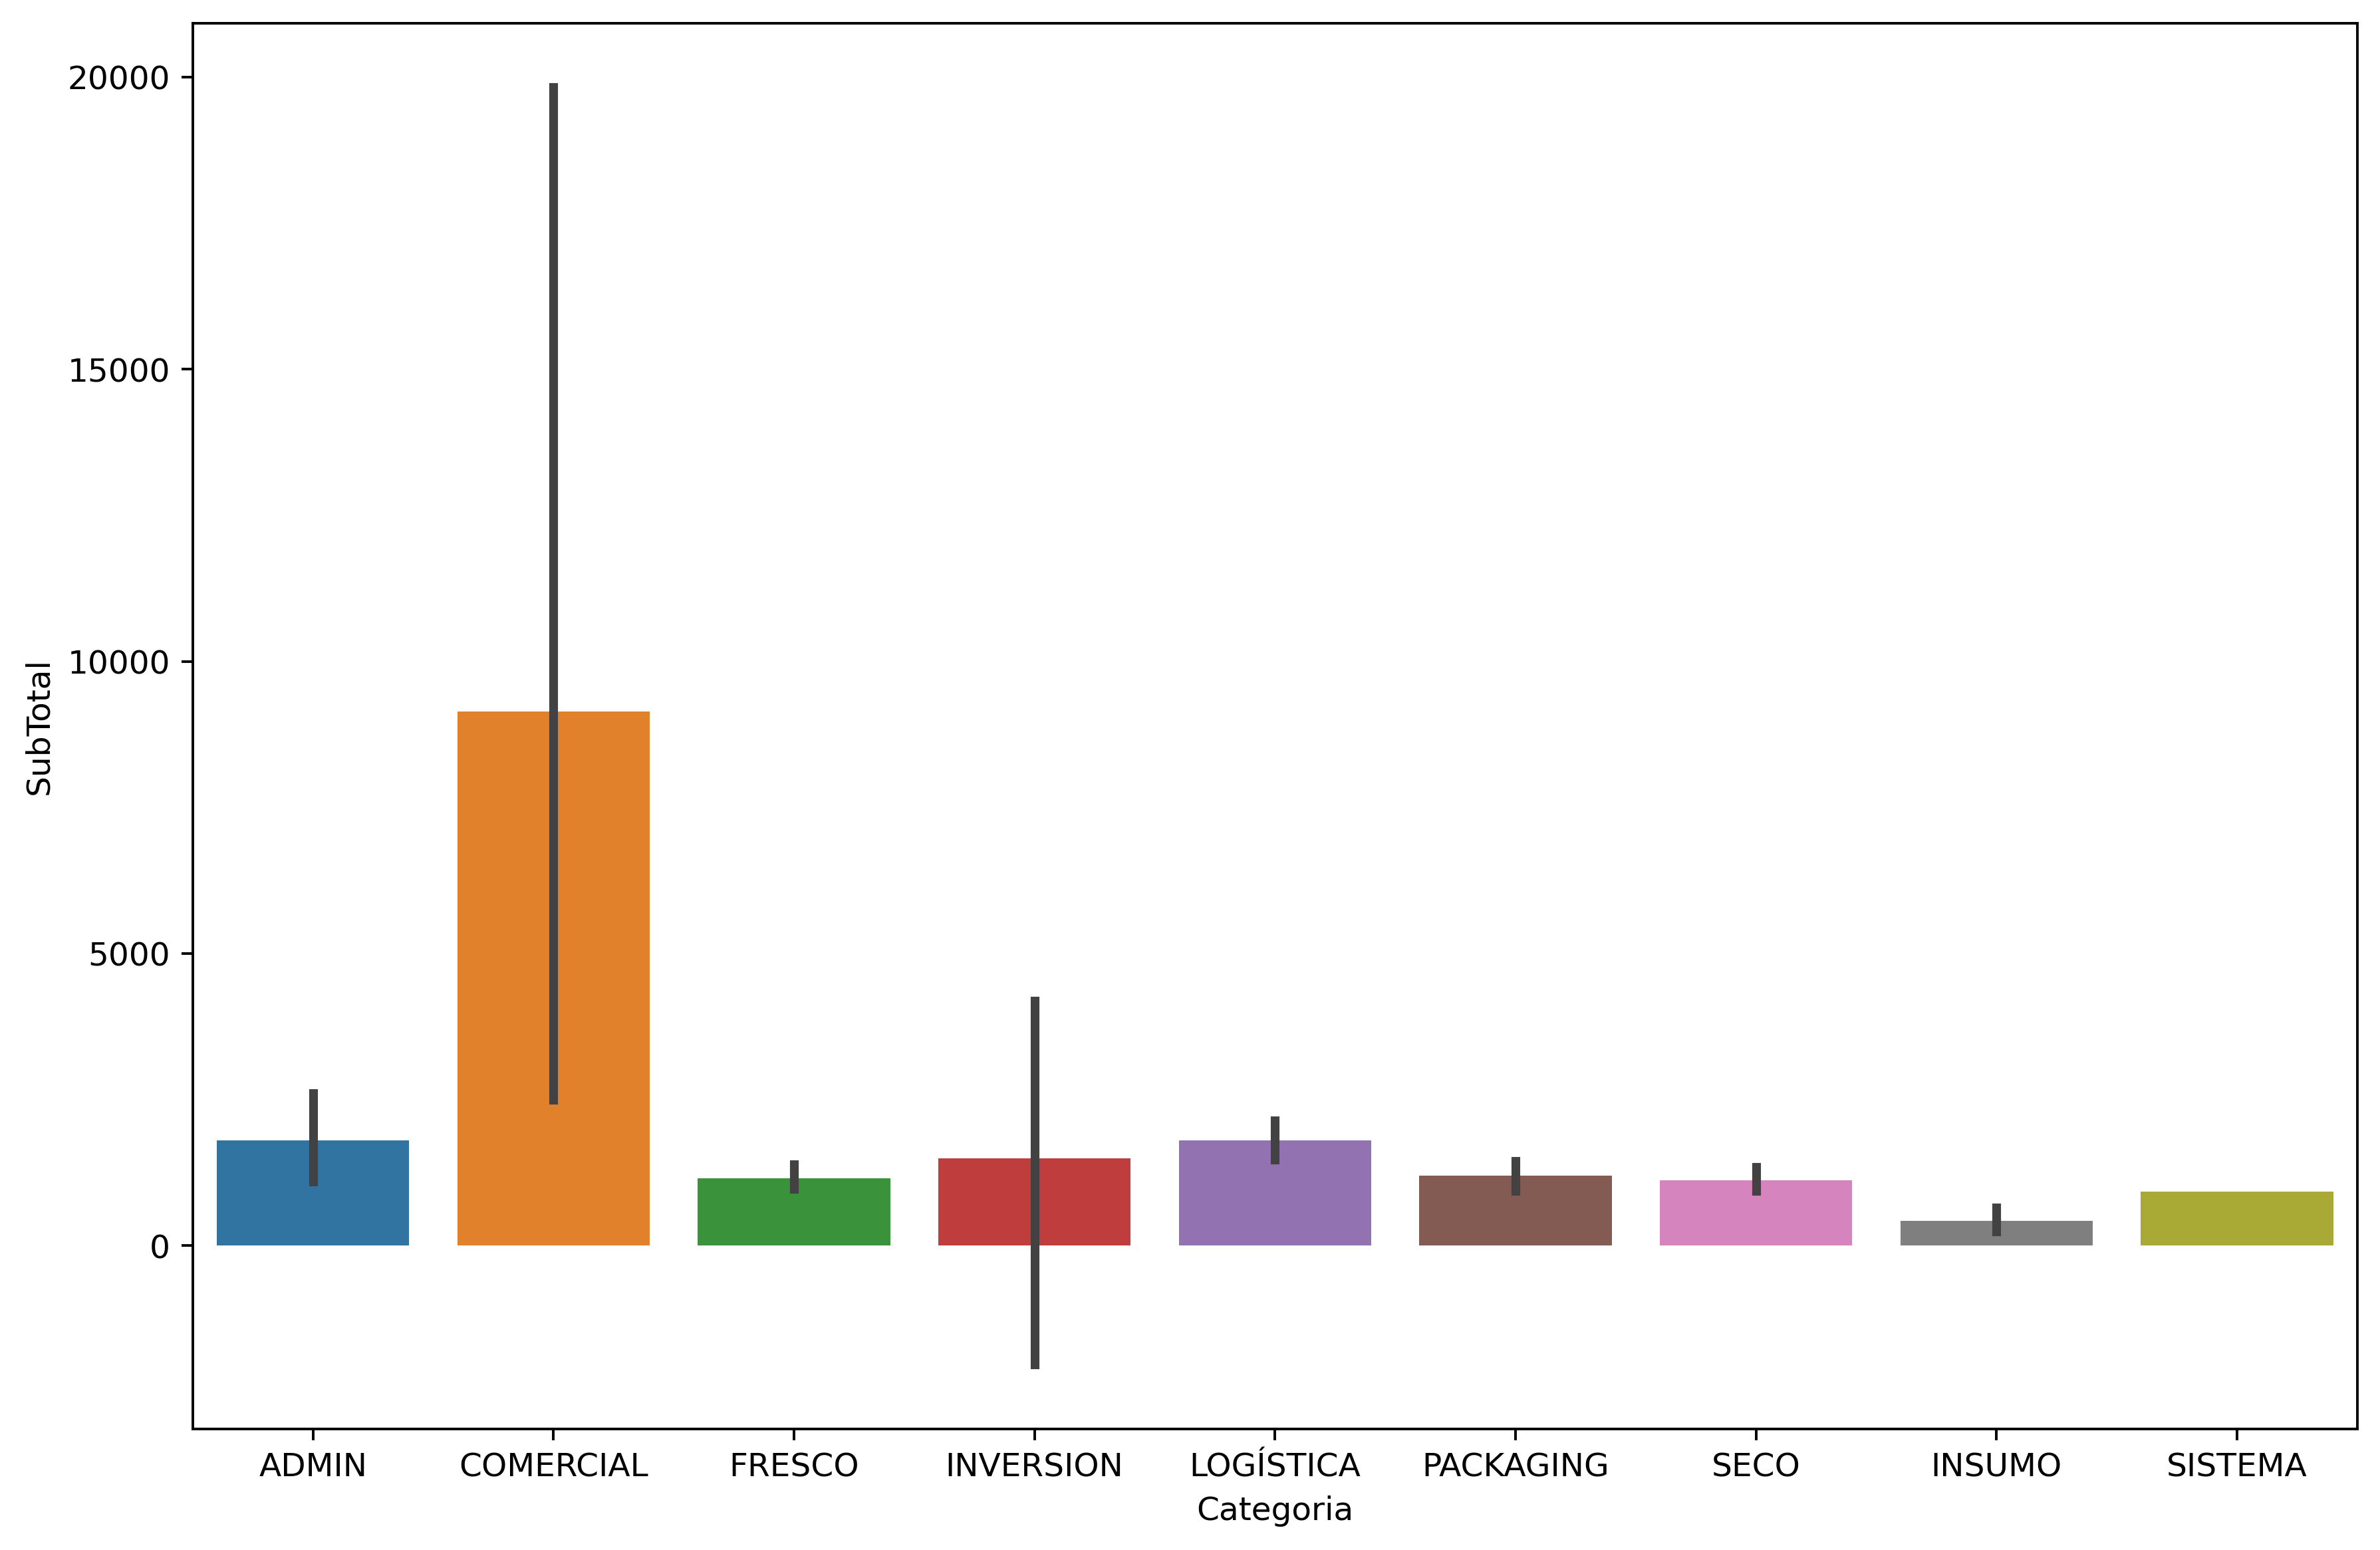

In [36]:
plt.figure(figsize=(12,8),dpi=350)
sns.barplot(data=category_ammount,x='Categoria',y='SubTotal')

In [37]:
fresco = category_ammount[category_ammount['Categoria'].isin(['FRESCO'])]

In [38]:
fresco.sort_values('SubTotal')

,mes_año,Categoria,year,Producto,SubTotal
371,072020,FRESCO,2020,ZANAHORIA,48.15
623,112021,FRESCO,2021,TOMATE,50.00
191,042020,FRESCO,2020,ESPINACA,50.00
359,072020,FRESCO,2020,ACEITUNA,54.75
95,022020,FRESCO,2020,CEB DE VERDEO,55.25
...,...,...,...,...,...
219,042021,FRESCO,2021,QUESO FRESCO,10305.63
401,072021,FRESCO,2021,QUESO FRESCO,10429.71
668,122021,FRESCO,2021,QUESO FRESCO,10648.78
52,012021,FRESCO,2021,QUESO FRESCO,14832.75


<AxesSubplot:xlabel='Producto', ylabel='SubTotal'>

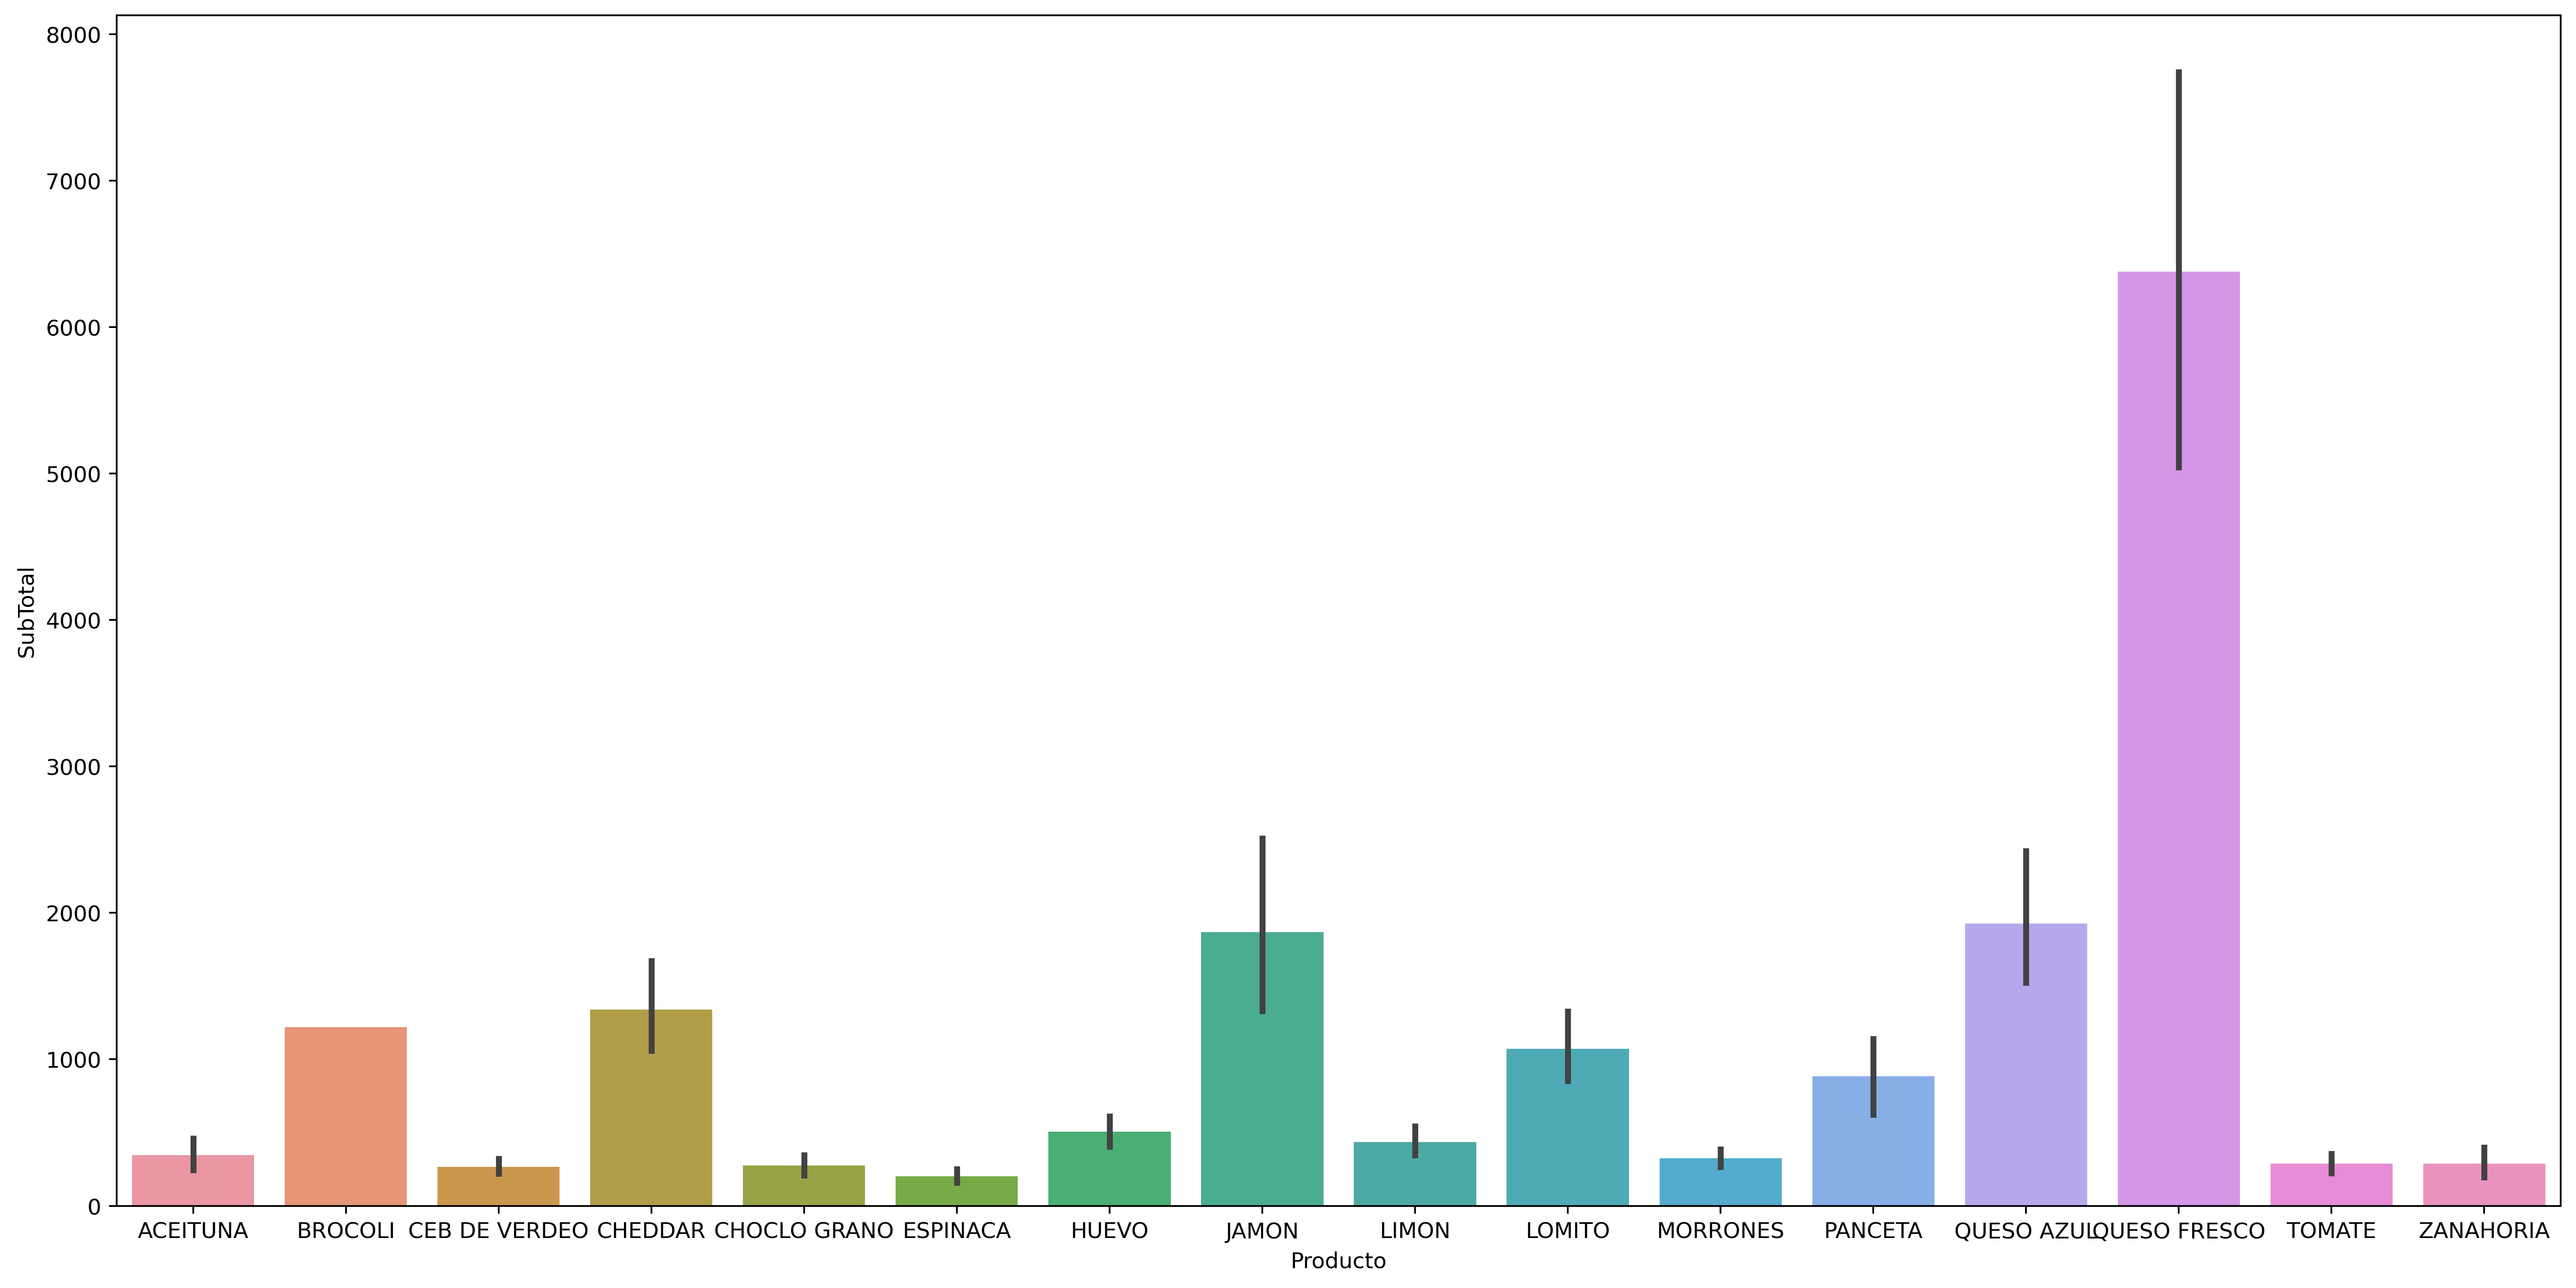

In [42]:
plt.figure(figsize=(20,10),dpi=350)
sns.barplot(data=fresco,x='Producto',y='SubTotal')

In [43]:
fresco.nlargest(10,'SubTotal')

,mes_año,Categoria,year,Producto,SubTotal
273,052021,FRESCO,2021,QUESO FRESCO,16260.85
52,012021,FRESCO,2021,QUESO FRESCO,14832.75
668,122021,FRESCO,2021,QUESO FRESCO,10648.78
401,072021,FRESCO,2021,QUESO FRESCO,10429.71
219,042021,FRESCO,2021,QUESO FRESCO,10305.63
492,092021,FRESCO,2021,QUESO FRESCO,8030.05
622,112021,FRESCO,2021,QUESO FRESCO,7987.04
16,012020,FRESCO,2020,QUESO FRESCO,7717.95
335,062021,FRESCO,2021,QUESO FRESCO,7332.29
249,052020,FRESCO,2020,QUESO FRESCO,6817.73


In [44]:
seco = category_ammount[category_ammount['Categoria'].isin(['SECO'])]

In [45]:
seco.sort_values('SubTotal',ascending=False)

,mes_año,Categoria,year,Producto,SubTotal
347,062021,SECO,2021,HARINA LEUDANTE,7833.68
67,012021,SECO,2021,HARINA LEUDANTE,6659.85
71,012021,SECO,2021,SOJA,5033.52
177,032021,SECO,2021,HARINA LEUDANTE,4869.10
31,012020,SECO,2020,HARINA LEUDANTE,4726.94
...,...,...,...,...,...
203,042020,SECO,2020,ACEITE,79.99
566,102021,SECO,2021,GARBANZO,74.39
134,022021,SECO,2021,NUEZ,60.00
28,012020,SECO,2020,GARBANZO,43.99


<AxesSubplot:xlabel='Producto', ylabel='SubTotal'>

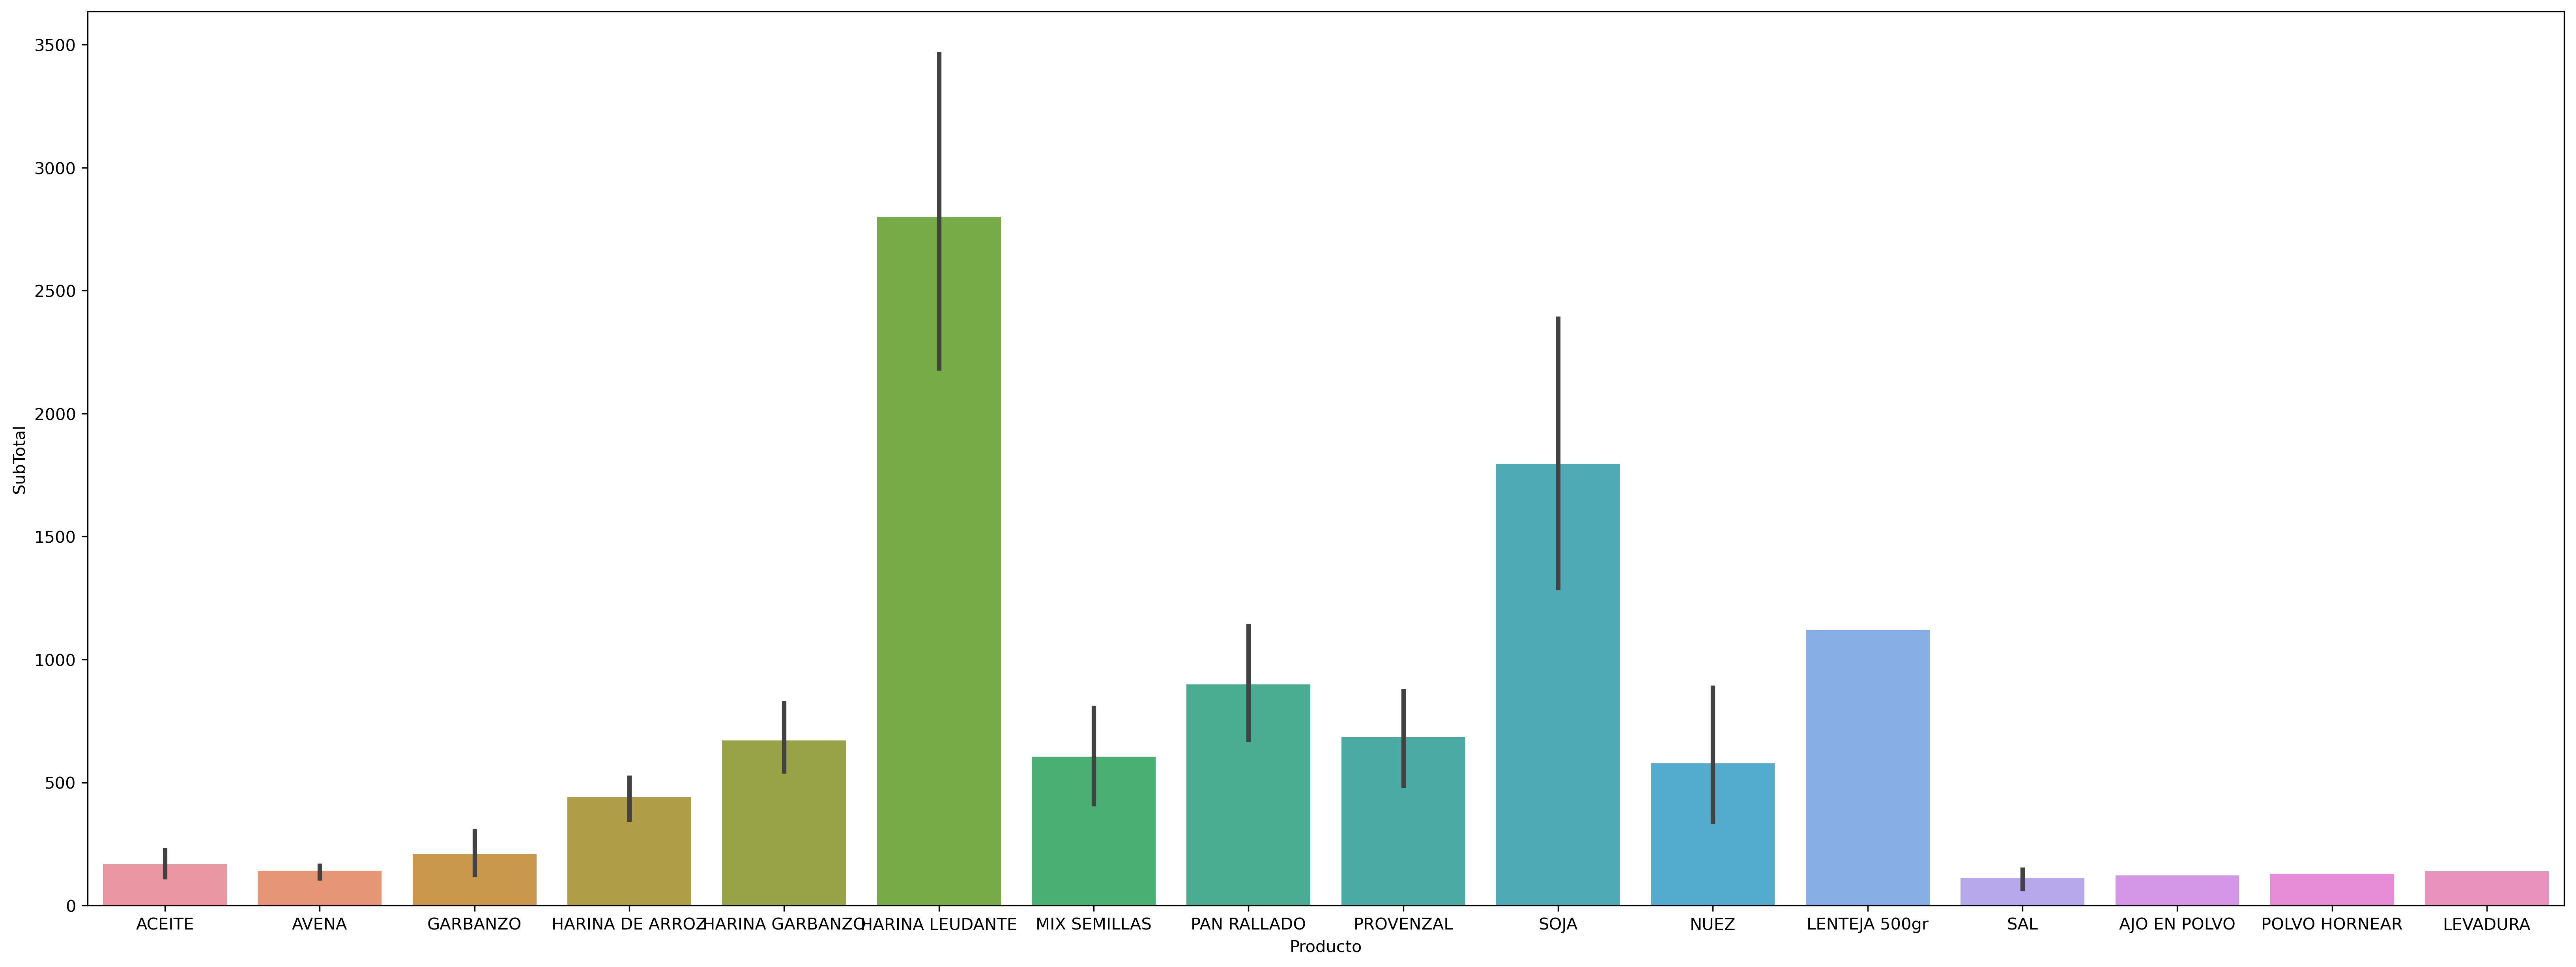

In [51]:
plt.figure(figsize=(27,10),dpi=300)
sns.barplot(data=seco,x='Producto',y='SubTotal')

Fresch Cheese is the biggest product on the category so I recomend develop new sellers/providers

<AxesSubplot:xlabel='mes_año', ylabel='Cantidad'>

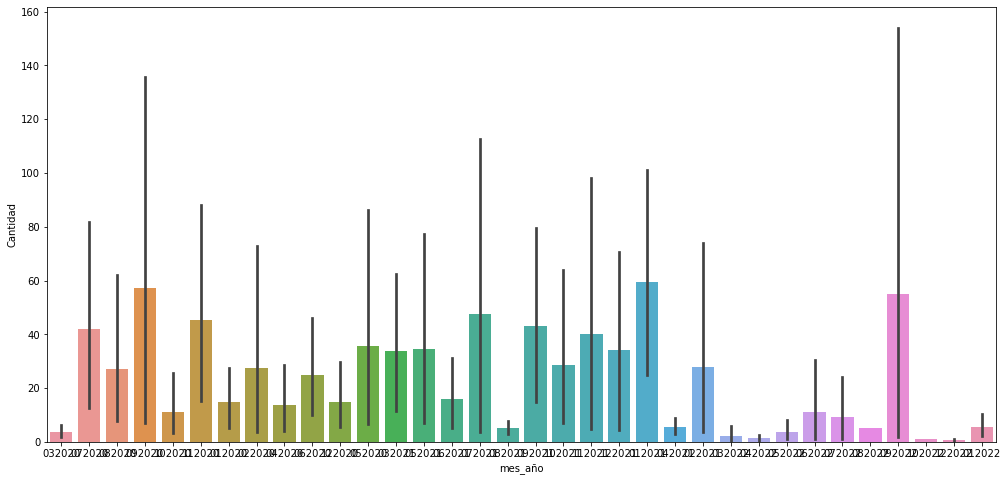

In [52]:
plt.figure(figsize=(17,8))
sns.barplot(data=df,x='mes_año',y='Cantidad')

<AxesSubplot:xlabel='mes_año', ylabel='SubTotal'>

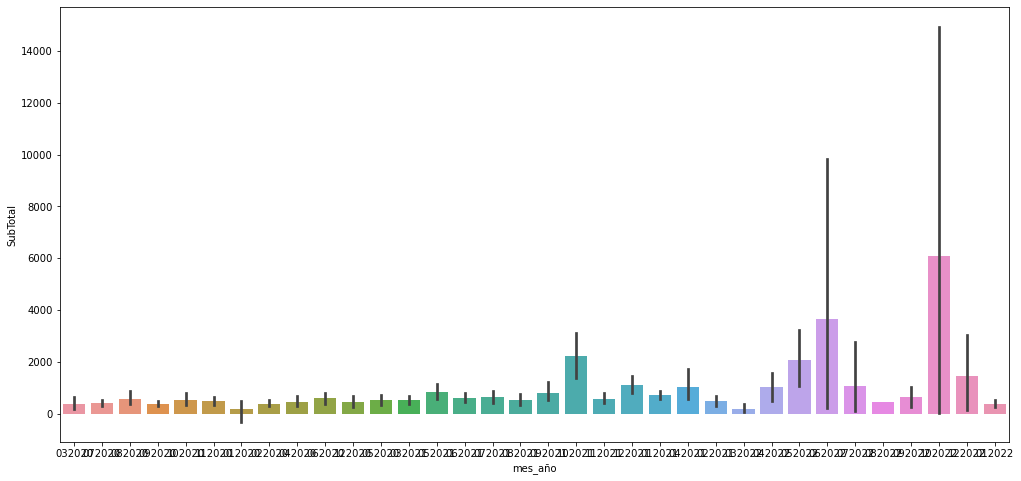

In [53]:
plt.figure(figsize=(17,8))
sns.barplot(data=df,x='mes_año',y='SubTotal')

<AxesSubplot:xlabel='mes_año', ylabel='SubTotal'>

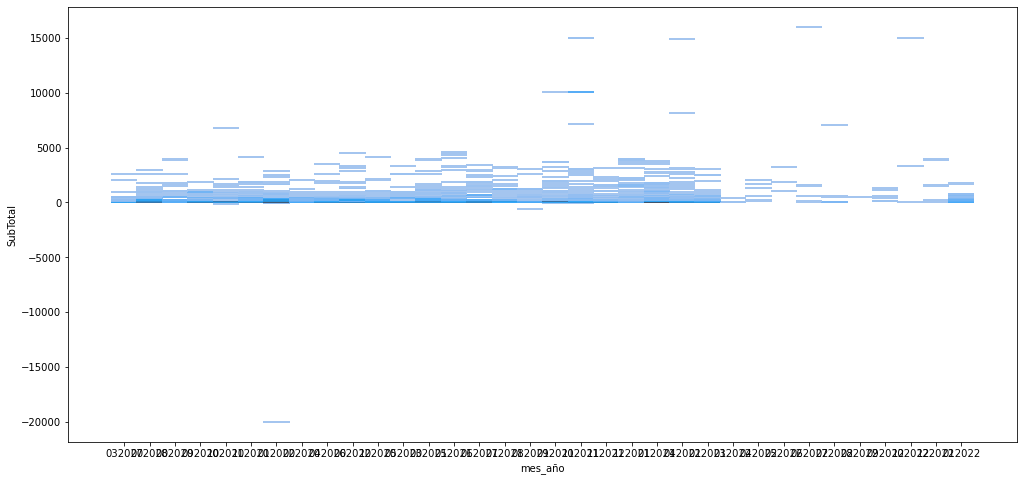

In [54]:
plt.figure(figsize=(17,8))
sns.histplot(data=df,x='mes_año',y='SubTotal')

<AxesSubplot:xlabel='mes_año', ylabel='SubTotal'>

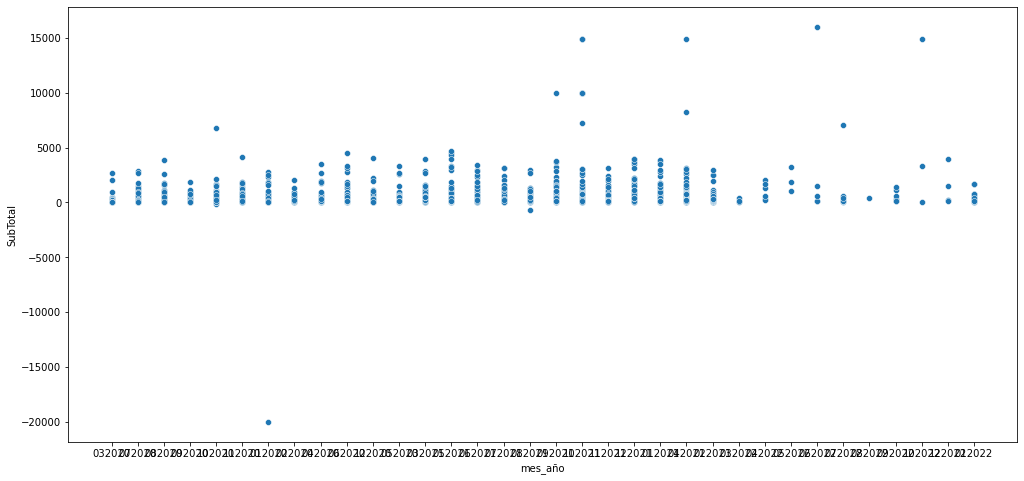

In [55]:
plt.figure(figsize=(17,8))
sns.scatterplot(data=df,x='mes_año',y='SubTotal')